# **Laboratorio Diseño de Novo - Ligand-Based | Matías Zúñiga**

*   Curso: Biomedicina y Biofarmaceutica
*   Profesor: Horacio Poblete
*   Ayudante: Eduardo Cubillos

---

Laboratorio de diseño de moleculas (*de novo*) utilizando herramientas de machine learning. Este cuaderno está basado en los códigos implementados por Chanin Nantasenamat (https://github.com/dataprofessor/code/tree/master/python) y la implementación de LSTM-Chem disponible en https://github.com/topazape/LSTM_Chem 

# En este laboratorio utilizaremos compuestos conocidos que se asocian a TRPM8 y entrenaremos un modelo de machine learning tipo LSTM en forma fine tuning. 

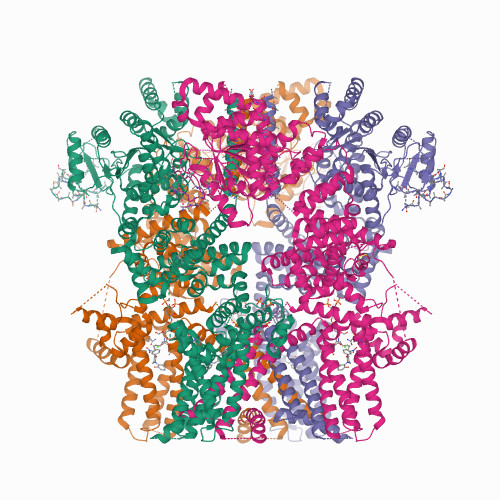

ESTRUCTURA DE LA PROTEINA Transient receptor potential cation channel subfamily M member 8

## **ChEMBL Database**

La base de datos [*ChEMBL*](https://www.ebi.ac.uk/chembl/) contiene millones de compuestos con actividad biológica. A través de esta se pueden obtener los códigos, SMILES y diferentes propiedades de interés para cada compuesto. 

## **Instalación de librerías**

En este practico instalaremos los paquetes necesarios para hacer consultas a la base de dato de compuestos de CheMBL.

In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 596 kB 17.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


## **Importación de Librerías**

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Búsqueda de Compuestos en una Proteína Target**

### **Búsqueda del Target TRPM8 Humano**

In [3]:
# Target search for TRPM8
target = new_client.target
target_query = target.search('Transient receptor potential cation channel subfamily M member 8')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,"Transient receptor potential cation channel, s...",71.0,False,CHEMBL3988624,"[{'accession': 'F1LMD7', 'component_descriptio...",SINGLE PROTEIN,10116.0
1,"[{'xref_id': 'Q8R455', 'xref_name': None, 'xre...",Rattus norvegicus,Transient receptor potential cation channel su...,66.0,False,CHEMBL5011,"[{'accession': 'Q8R455', 'component_descriptio...",SINGLE PROTEIN,10116.0
2,"[{'xref_id': 'Q7Z2W7', 'xref_name': None, 'xre...",Homo sapiens,Transient receptor potential cation channel su...,66.0,False,CHEMBL1075319,"[{'accession': 'Q7Z2W7', 'component_descriptio...",SINGLE PROTEIN,9606.0
3,[],Mus musculus,Transient receptor potential cation channel su...,66.0,False,CHEMBL3108632,"[{'accession': 'Q8R4D5', 'component_descriptio...",SINGLE PROTEIN,10090.0
4,[],Rattus norvegicus,Transient receptor potential cation channel su...,64.0,False,CHEMBL4295638,"[{'accession': 'E9PTA2', 'component_descriptio...",SINGLE PROTEIN,10116.0
...,...,...,...,...,...,...,...,...,...
3289,[],Homo sapiens,VHL/KIT,1.0,False,CHEMBL4523731,"[{'accession': 'P10721', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
3290,[],Homo sapiens,F-box-like/WD repeat-containing protein TBL1XR...,1.0,False,CHEMBL4523746,"[{'accession': 'P41182', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
3291,[],Homo sapiens,Interferon-induced helicase C domain-containin...,1.0,False,CHEMBL4739862,"[{'accession': 'Q9BYX4', 'component_descriptio...",SINGLE PROTEIN,9606.0
3292,[],Homo sapiens,80S Ribosome,0.0,False,CHEMBL3987582,"[{'accession': 'P08865', 'component_descriptio...",PROTEIN NUCLEIC-ACID COMPLEX,9606.0


### **Seleccionar y obtener valores de actividad para nuestra proteina target**

Asignaremos el tercer valor correspondiente a nuestro target TRPM8 Humano

In [4]:
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL1075319'

Acá obtendremos aquellos compuestos que presentan ensayos de actividad de tipo IC50. Revisar documentación de CheMBL para incluir otro tipo de filtros.

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,3301197,[],CHEMBL1118224,Antagonist activity at human TRPM8 channel,F,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,30.0
1,None,3365573,[],CHEMBL1176441,Antagonist activity at human TRPM8 receptor,F,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,44.0
2,None,3440660,[],CHEMBL1243615,Displacement of [3H]menthol from human TRPM8 e...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,92.0
3,None,3440661,[],CHEMBL1243616,Displacement of [3H]menthol from human TRPM8 K...,B,Q7Z2W7,K856A,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,19.0
4,None,3440662,[],CHEMBL1243617,Displacement of [3H]menthol from human TRPM8 R...,B,Q7Z2W7,R842A,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Active,23095604,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510742,Cold activation,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,480.0
618,Active,23095605,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510743,Voltage activation at room temperature,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,103.0
619,Active,23095606,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510744,Voltage activation at 12 °C,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,13.8
620,Active,23095607,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510745,Transients WS-12 activation,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,29.6


Guardaremos esta informacion en un primer archivo de tipo CSV  **bioactivity_data.csv**.

In [7]:
df.to_csv('TRPM8_01_bioactivity_data_raw.csv', index=False)

## **Manejando datos faltantes o erróneos**
Si algún compuesto no incluye valores en las columnas **standard_value** o **canonical_smiles** se eliminará.

In [8]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,3301197,[],CHEMBL1118224,Antagonist activity at human TRPM8 channel,F,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,30.0
1,None,3365573,[],CHEMBL1176441,Antagonist activity at human TRPM8 receptor,F,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,44.0
2,None,3440660,[],CHEMBL1243615,Displacement of [3H]menthol from human TRPM8 e...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,92.0
3,None,3440661,[],CHEMBL1243616,Displacement of [3H]menthol from human TRPM8 K...,B,Q7Z2W7,K856A,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,19.0
4,None,3440662,[],CHEMBL1243617,Displacement of [3H]menthol from human TRPM8 R...,B,Q7Z2W7,R842A,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Active,23095604,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510742,Cold activation,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,480.0
618,Active,23095605,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510743,Voltage activation at room temperature,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,103.0
619,Active,23095606,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510744,Voltage activation at 12 °C,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,13.8
620,Active,23095607,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510745,Transients WS-12 activation,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,29.6


In [9]:
len(df2.canonical_smiles.unique())

561

In [10]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,3301197,[],CHEMBL1118224,Antagonist activity at human TRPM8 channel,F,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,30.0
1,None,3365573,[],CHEMBL1176441,Antagonist activity at human TRPM8 receptor,F,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,44.0
2,None,3440660,[],CHEMBL1243615,Displacement of [3H]menthol from human TRPM8 e...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,92.0
5,None,3601450,[],CHEMBL1292427,Antagonist activity at human TRPM8 receptor ex...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,0.34
6,None,3601451,[],CHEMBL1292427,Antagonist activity at human TRPM8 receptor ex...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,None,22485132,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4688478,Antagonist activity at human TRPM8 transfected...,B,None,None,BAO_0000179,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,None,None,2.2
610,None,22485133,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4688478,Antagonist activity at human TRPM8 transfected...,B,None,None,BAO_0000179,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,None,None,1.7
612,None,22816828,[],CHEMBL4715035,Antagonist activity at recombinant human TRPM8...,B,None,None,BAO_0000179,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,nM,None,None,805.0
615,None,22816833,[],CHEMBL4715039,Antagonist activity at recombinant human TRPM8...,B,None,None,BAO_0000179,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,None,None,2.0


## **Procesamiento de datos de Bioactividad**

### **Se combinará la información de las columnas canonical_smiles, molecule_chembl_id y standard_value y se generará una nueva columna de tipo class**

In [ ]:
selection = ['canonical_smiles', 'molecule_chembl_id','standard_value']
df3 = df2_nr[selection]
df3

,canonical_smiles,molecule_chembl_id,standard_value
0,CC(C)c1ccc(NC(=O)Cn2cnc3c2c(=O)n(C)c(=O)n3C)cc1,CHEMBL1086310,30000.0
1,Cc1nc(Nc2cccc3c2C[C@H](O)CC3)oc1-c1ccc(C(F)(F)...,CHEMBL1173240,44000.0
2,CC1CCC(C(C)C)C(O)C1,CHEMBL256087,92000.0
5,NCCc1c[nH]c2ccc(OCc3ccccc3)cc12,CHEMBL1288652,340.0
6,Cc1[nH]c2ccc(OCc3ccccc3)cc2c1CCN,CHEMBL1289835,1500.0
...,...,...,...
609,C[C@H](c1cc(F)cc(F)c1F)N(C(=O)c1ccccc1)[C@@H](...,CHEMBL4751372,2200.0
610,C[C@H](c1cc(F)c(F)c(F)c1)N(C(=O)c1ccccc1)[C@@H...,CHEMBL4764800,1700.0
612,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1NC(=O)c1ccc(-c2c...,CHEMBL1094770,805.0
615,C=C1[C@@H](OC(=O)c2ccccc2)[C@H](C(C)C)CC[C@H]1C,CHEMBL4777173,2000.0


Guardaremos el progreso en un archivo CSV

In [ ]:
df3.to_csv('TRPM8_02_bioactivity_data_preprocessed.csv', index=False)

### **Clasificación de Compuestos Activos, Intermedios y No activos**
La información de actividad biológica está en unidades de IC50. Los compuestos que tienen valores menores a 100 nM se considerarán como **activo** mientras que valores superiores a 10000 nM se definirán como **no activo**. En el rango 1000-10000 se definirán con actividad **intermedia**. 

In [ ]:
df4 = pd.read_csv('TRPM8_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,canonical_smiles,molecule_chembl_id,standard_value,class
0,CC(C)c1ccc(NC(=O)Cn2cnc3c2c(=O)n(C)c(=O)n3C)cc1,CHEMBL1086310,30000.0,inactive
1,Cc1nc(Nc2cccc3c2C[C@H](O)CC3)oc1-c1ccc(C(F)(F)...,CHEMBL1173240,44000.0,inactive
2,CC1CCC(C(C)C)C(O)C1,CHEMBL256087,92000.0,inactive
3,NCCc1c[nH]c2ccc(OCc3ccccc3)cc12,CHEMBL1288652,340.0,active
4,Cc1[nH]c2ccc(OCc3ccccc3)cc2c1CCN,CHEMBL1289835,1500.0,intermediate
...,...,...,...,...
556,C[C@H](c1cc(F)cc(F)c1F)N(C(=O)c1ccccc1)[C@@H](...,CHEMBL4751372,2200.0,intermediate
557,C[C@H](c1cc(F)c(F)c(F)c1)N(C(=O)c1ccccc1)[C@@H...,CHEMBL4764800,1700.0,intermediate
558,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1NC(=O)c1ccc(-c2c...,CHEMBL1094770,805.0,active
559,C=C1[C@@H](OC(=O)c2ccccc2)[C@H](C(C)C)CC[C@H]1C,CHEMBL4777173,2000.0,intermediate


In [ ]:
selection = ['canonical_smiles', 'molecule_chembl_id','class']
df6 = df5[selection]
df6 = df6[df6['class'] != "inactive"]
df6

,canonical_smiles,molecule_chembl_id,class
3,NCCc1c[nH]c2ccc(OCc3ccccc3)cc12,CHEMBL1288652,active
4,Cc1[nH]c2ccc(OCc3ccccc3)cc2c1CCN,CHEMBL1289835,intermediate
7,NCCc1c[nH]c2c(OCc3ccccc3)cccc12,CHEMBL460302,intermediate
8,CN(C)CCc1c[nH]c2ccc(OCc3ccccc3)cc12,CHEMBL357130,intermediate
12,Cc1cccc(COc2ccccc2C(=O)N(CCCN)Cc2cccs2)c1,CHEMBL1289953,active
...,...,...,...
556,C[C@H](c1cc(F)cc(F)c1F)N(C(=O)c1ccccc1)[C@@H](...,CHEMBL4751372,intermediate
557,C[C@H](c1cc(F)c(F)c(F)c1)N(C(=O)c1ccccc1)[C@@H...,CHEMBL4764800,intermediate
558,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1NC(=O)c1ccc(-c2c...,CHEMBL1094770,active
559,C=C1[C@@H](OC(=O)c2ccccc2)[C@H](C(C)C)CC[C@H]1C,CHEMBL4777173,intermediate


Guardaremos la informacion en un archivo CSV

In [ ]:
df6.to_csv('TRPM8_03_bioactivity_data_curated.csv', index=False, sep = '\t')

Finalmente, solo guardaremos aquellos compuestos que tienen actividad biológica por nuestro target (formato SMI)

In [ ]:
df7 = df6['canonical_smiles']
df7



3                        NCCc1c[nH]c2ccc(OCc3ccccc3)cc12
4                       Cc1[nH]c2ccc(OCc3ccccc3)cc2c1CCN
7                        NCCc1c[nH]c2c(OCc3ccccc3)cccc12
8                    CN(C)CCc1c[nH]c2ccc(OCc3ccccc3)cc12
12             Cc1cccc(COc2ccccc2C(=O)N(CCCN)Cc2cccs2)c1
                             ...                        
556    C[C@H](c1cc(F)cc(F)c1F)N(C(=O)c1ccccc1)[C@@H](...
557    C[C@H](c1cc(F)c(F)c(F)c1)N(C(=O)c1ccccc1)[C@@H...
558    CC(C)[C@@H]1CC[C@@H](C)C[C@H]1NC(=O)c1ccc(-c2c...
559      C=C1[C@@H](OC(=O)c2ccccc2)[C@H](C(C)C)CC[C@H]1C
560    C[C@H](c1ccc(F)cc1)N(Cc1ccc(Cl)c(C(=O)O)c1)C(=...
Name: canonical_smiles, Length: 428, dtype: object

In [ ]:
df7.to_csv('TRPM8_inhibitors.smi', index=False, header=None, sep = '\t')

# **Ahora utilizaremos LSTM_Chem para generar nuevos compuestos**

In [ ]:
!git clone https://github.com/topazape/LSTM_Chem

Cloning into 'LSTM_Chem'...
remote: Enumerating objects: 744, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 744 (delta 22), reused 17 (delta 7), pack-reused 700
Receiving objects: 100% (744/744), 428.16 MiB | 32.22 MiB/s, done.
Resolving deltas: 100% (288/288), done.
Checking out files: 100% (83/83), done.


In [ ]:
cd LSTM_Chem/

/content/LSTM_Chem


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple/
Ignoring numpy: markers 'python_version >= "3.9"' don't match your environment
     |████████████████████████████████| 132 kB 4.8 MB/s 
     |████████████████████████████████| 96 kB 4.7 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 157 kB 34.9 MB/s 
     |████████████████████████████████| 145 kB 50.2 MB/s 
     |████████████████████████████████| 402 kB 56.9 MB/s 
     |████████████████████████████████| 4.6 MB 38.0 MB/s 
     |████████████████████████████████| 4.3 MB 42.7 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 123 kB 58.7 MB/s 
     |████████████████████████████████| 787 kB 53.3 MB/s 
     |████████████████████████████████| 121 kB 50.4 MB/s 
     |████████████████████████████████| 1.4 MB 45.7 MB/s 
     |████████████████████████████████| 133 kB 64.5 MB/s 
     |████████████████████████████████| 303 kB 62.5 MB/s 
     |███████

---

Reinstalaremos matplotlib para poder visualizar un grafico posterior

In [ ]:
!pip --no-input uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 86, in run
    auto_confirm=optio

Importamos las librerias necesarias para realizar el practico

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

from lstm_chem.utils.config import process_config
from lstm_chem.model import LSTMChem
from lstm_chem.finetuner import LSTMChemFinetuner
from lstm_chem.data_loader import DataLoader

Se crea un modelo para finetuning utilizando como set de datos 5 moleculas conocidas y se entrena por 12 epocas. Para sistemas propios revisar archivos config.json y base.json

In [ ]:
config = process_config('experiments/2020-03-24/LSTM_Chem/config.json')

modeler = LSTMChem(config, session='finetune')
finetune_dl = DataLoader(config, data_type='finetune')

finetuner = LSTMChemFinetuner(modeler, finetune_dl)
finetuner.finetune()

Loading model architecture from experiments/2020-03-24/LSTM_Chem/model_arch.json ...
Loading model checkpoint from experiments/2020-03-24/LSTM_Chem/checkpoints/LSTM_Chem-22-0.45.hdf5 ...
Loaded the Model.
loading SMILES...
done.
tokenizing SMILES...


100%|██████████| 5/5 [00:00<00:00, 6817.79it/s]

done.


Epoch 1/12
5/5 [==============================] - 11s 278ms/step - loss: 1.0714
Epoch 2/12
5/5 [==============================] - 1s 305ms/step - loss: 0.9591
Epoch 3/12
5/5 [==============================] - 2s 321ms/step - loss: 0.6643
Epoch 4/12
5/5 [==============================] - 1s 179ms/step - loss: 0.6451
Epoch 5/12
5/5 [==============================] - 1s 164ms/step - loss: 0.6428
Epoch 6/12
5/5 [==============================] - 1s 162ms/step - loss: 0.5253
Epoch 7/12
5/5 [==============================] - 1s 157ms/step - loss: 0.4562
Epoch 8/12
5/5 [==============================] - 1s 187ms/step - loss: 0.4726
Epoch 9/12
5/5 [==============================] - 1s 172ms/step - loss: 0.4452
Epoch 10/12
5/5 [==============================] - 1s 166ms/step - loss: 0.4774
Epoch 11/12
5/5 [==============================] - 1s 168ms/step - loss: 0.3407
Epoch 12/12
5/5 [==============================] - 1s 182ms/step - loss: 0.3702


Se crean 100 moleculas nuevas 

In [ ]:
finetuned_smiles = finetuner.sample(num=100)

Utilizaremos este archivo para comparar los componentes principales

In [ ]:
!python cleanup_smiles.py -ft ../TRPM8_inhibitors.smi ./TRPM8-inhibitors_cleaned.smi

input SMILES num: 428
start to clean up
100% 428/428 [00:00<00:00, 717.40it/s]
done.
output SMILES num: 416


In [ ]:
with open('./TRPM8-inhibitors_cleaned.smi') as f:
    ksmiles = [l.rstrip() for l in f]
kmols = [Chem.MolFromSmiles(smi) for smi in ksmiles]

Kfps = []
for mol in kmols:
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Kfps.append(fp)

Klen = len(Kfps)

Cargamos las moleculas utilizadas para el FINETUNING

In [ ]:
with open('./datasets/TRPM8_inhibitors_for_fine-tune.smi') as f:
    fsmiles = [l.rstrip() for l in f]
fmols = [Chem.MolFromSmiles(smi) for smi in fsmiles]

Ffps, Fbvs = [], []
for mol in fmols:
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    Fbvs.append(bv)
    
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Ffps.append(fp)

Flen = len(Ffps)

Cargamos las moleculas generadas por el modelo.

In [ ]:
Sfps, Sbvs, smols = [], [], []
for smi in finetuned_smiles:
    mol = Chem.MolFromSmiles(smi)
    smols.append(mol)
    
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    Sbvs.append(bv)
    
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Sfps.append(fp)

Calculamos los 2 componentes principales de los grupos de moleculas con el fin de compararlas.

In [ ]:
x = Kfps + Ffps + Sfps
pca = PCA(n_components=2, random_state=71)
X = pca.fit_transform(x)

Graficamos los 2 PCA del set de moleculas conocidas, las 5 para finetuning y las generadas.

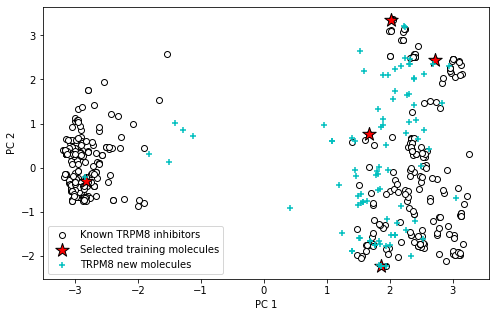

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:Klen, 0], X[:Klen, 1],
            c='w', edgecolors='k', label='Known TRPM8 inhibitors')
plt.scatter(X[Klen:Klen + Flen, 0], X[Klen:Klen + Flen, 1],
            s=200, c='r', marker='*', edgecolors='k', label='Selected training molecules')
plt.scatter(X[Klen + Flen:, 0], X[Klen + Flen:, 1],
            c='c', marker='+', label='TRPM8 new molecules')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend();

Seleccionamos aquellas que tengan un mejor indicide de Tanimoto (se parezcan mas)

In [ ]:
idxs = []
for Fbv in Fbvs:
    idx = np.argmax(DataStructs.BulkTanimotoSimilarity(Fbv, Sbvs))
    idxs.append(idx)
nsmols = [smols[idx] for idx in idxs]

Las agregamos a un arreglo para compararlas con las 5 seleccionadas del finetuning

In [ ]:
showmols = []
for i, j in zip(fmols, nsmols):
    showmols.append(i)
    showmols.append(j)

Observaremos a la izquierda la molecula original tomada para el finetuning y a la derecha la molecula mas parecida generada por el modelo.

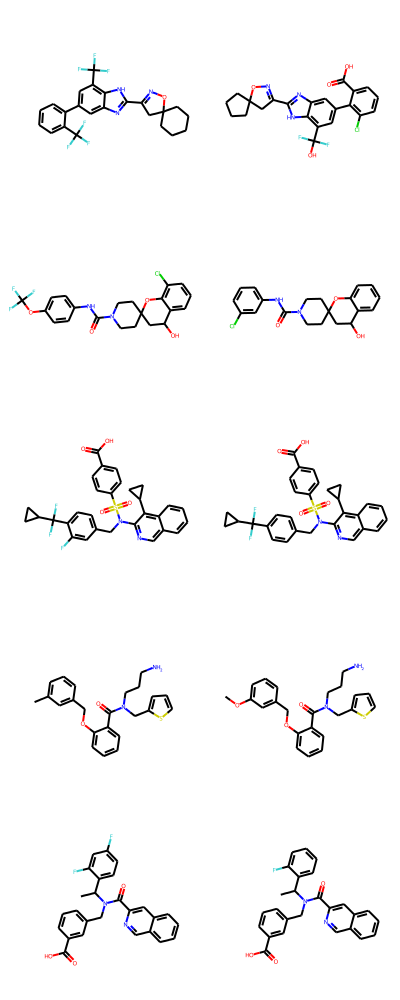

In [ ]:
Draw.MolsToGridImage(showmols, molsPerRow=2)


Finalmente obtenemos los SMILES de las moleculas generadas

In [ ]:
for molecule in nsmols:
    mol = Chem.MolToSmiles(molecule)
    print(mol)

O=C(O)c1cccc(Cl)c1-c1cc(C(O)(F)F)c2[nH]c(C3=NOC4(CCCC4)C3)nc2c1
O=C(Nc1cccc(Cl)c1)N1CCC2(CC1)CC(O)c1ccccc1O2
O=C(O)c1ccc(S(=O)(=O)N(Cc2ccc(C(F)(F)C3CC3)cc2)c2ncc3ccccc3c2C2CC2)cc1
COc1cccc(COc2ccccc2C(=O)N(CCCN)Cc2cccs2)c1
CC(c1ccccc1F)N(Cc1cccc(C(=O)O)c1)C(=O)c1cc2ccccc2cn1
